In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pylab
pylab.rcParams['figure.figsize'] = (15.0, 15.0)

In [2]:
T = 50.
dt = 1E-3
N = int(T/dt)
TIME = np.linspace(0, T, N)

In [3]:
k = .04, 5, 140
u0 = -20
v0 = -70
v_thr = 30
a, b, c, d = .02, -.1, -55, 6

$$
f\left( v \right) = k_1 \cdot v^2 + k_2 \cdot v + k_3
$$

In [4]:
def f(v):
    return k[0] * (v**2) + k[1] * v + k[2]

$$
\dot{v} = f\left( v \right) - u + I
$$

In [5]:
def Vt(v, u, I):
    return f(v) - u + I

$$
\dot{u} = a \cdot \left( b \cdot v - u \right)
$$

In [6]:
def Ut(v, u):
    return a * (b * v - u)

$$
v \approx v_{thr}
\Longrightarrow
\begin{cases}
v \rightarrow c \\
u \rightarrow u + d
\end{cases}
$$

# Isoclines

$$
\begin{cases}
0 = \dot{v} = f\left( v \right) - u + I \\
0 = \dot{u} = a \cdot \left( b \cdot v - u \right)
\end{cases}
\Longrightarrow
\begin{cases}
k_1 \cdot v^2 + k_2 \cdot v + k_3 - u + I = 0\\
a \cdot \left( b \cdot v - u \right) = 0
\end{cases}
\Longrightarrow
\begin{cases}
k_1 \cdot v^2 + v \cdot \left( k_2 - b \right) + k_3 + I = 0\\
b \cdot v = u
\end{cases}
$$

Discriminant for the first equation
$$
D = \left( k_2 - b \right)^2 - 4 \cdot k_1 \cdot \left( k_3 + I \right)
$$

Thus
$$
\begin{cases}
v_{1, 2} = \frac{-b \pm \sqrt{\left( k_2 - b \right)^2 - 4 \cdot k_1 \cdot \left( k_3 + I \right)}}{2 \cdot k_1} \\
u_{1, 2} = v_{1, 2} \cdot b
\end{cases}
$$

Critical value for $I$ can be fetched from the equation
$$
\left( k_2 - b \right)^2 - 4 \cdot k_1 \cdot \left( k_3 + I \right) = 0
$$
Result is
$$
I_{cr} = \frac{\left( k_2 - b \right)^2}{4 \cdot k_1} - k_3
$$

In [7]:
I_critical = ((k[1] - b)**2) / (4 * k[0]) - k[2]; I_critical

22.56249999999997

In [8]:
v_critical = - b / (2 * k[0])

In [9]:
u_critical = b * v_critical

# Critical values

$$
\begin{cases}
v_{cr} = \frac{-b}{2 \cdot k_1} \\
u_{cr} = \frac{-b^2}{2 \cdot k_1} = b \cdot v_{cr}
\end{cases}
$$

# Linearization

$$
\begin{cases}
\dot{v} = k_1 \cdot v^2 + k_2 \cdot v + k_3 - u + I \\
\dot{u} = a \cdot \left( b \cdot v - u \right)
\end{cases}
$$

Jacobian
$$
J =
\begin{bmatrix}
k_1 \cdot v + k_2 & -1 \\
a \cdot b & -a
\end{bmatrix}
$$

Linearized Jacobian
$$
J_l =
\begin{bmatrix}
\frac{-b}{2} + k_2 & -1 \\
a \cdot b & -a
\end{bmatrix}
$$

Characteristics polynomial
$$
\begin{vmatrix}
\frac{-b + 2 \cdot k_2}{2} - \lambda & -1 \\
a \cdot b & -a - \lambda
\end{vmatrix}
= \left( \frac{b - 2 \cdot k_2}{2} + \lambda \right) \cdot \left( a + \lambda \right) + a \cdot b
= \frac{a \cdot \left( b - 2 \cdot k_2 \right)}{2} + \frac{\left( b - 2 \cdot k_2 \right) \cdot \lambda}{2} + \lambda \cdot a + \lambda^2 + a \cdot b
$$
Finally
$$
\lambda^2 + \lambda \cdot \frac{b - 2 \cdot k_2 + 2 \cdot a}{2} + a \cdot \frac{2 \cdot b - 2 \cdot k_2 + 2}{2} = 0
$$

Discriminant
$$
D = \left( \frac{b - 2 \cdot k_2 + 2 \cdot a}{2} \right)^2 - 4 \cdot a \cdot \left( b - k_2 + 1 \right)
$$
Solutions
$$
\lambda_{1, 2}
= \frac{- \frac{b - 2 \cdot k_2 + 2 \cdot a}{2}
    \pm \sqrt{\left( \frac{b - 2 \cdot k_2 + 2 \cdot a}{2} \right)^2 - 4 \cdot a \cdot \left( b - k_2 + 1 \right)}}
  {2}
$$

In [10]:
first = (b - k[1] + 2*a) / 2
second = first**2 - 4 * a * (b - k[1] + 1)
(- first + second**.5)/2, (- first - second**.5)/2

(2.562006168065518, -0.03200616806551859)

$\lambda_{1, 2} = 2.56 \pm 0.032i$ &mdash; eigenvalues are complex-conjugated, real part is positive &mdash; we have unstable focus [equilibrium](http://www.scholarpedia.org/article/Equilibrium)

# Eigenvectors

By definition eigenvectors $e_{1, 2}$ can be found from the equation
$$
\begin{bmatrix}
\frac{-b}{2} + k_2 & -1 \\
a \cdot b & -a
\end{bmatrix}
\cdot e
= e \cdot \lambda
$$
In scalar form
$$
\begin{bmatrix}
e_v \cdot \left( \frac{-b}{2} + k_2 \right) - e_u \\
e_v \cdot a \cdot b - e_u \cdot a
\end{bmatrix}
= \begin{bmatrix} e_v \\ e_u \end{bmatrix}
\cdot \lambda
$$
Move right part to left
$$
\begin{bmatrix}
e_v \cdot \left( \frac{-b}{2} + k_2 - \lambda \right) - e_u \\
e_v \cdot a \cdot b - e_u \cdot \left( a + \lambda \right)
\end{bmatrix}
= \begin{bmatrix} 0 \\ 0 \end{bmatrix}
$$
Let's rewrite this as a product
$$
\begin{bmatrix}
\left( \frac{-b}{2} + k_2 - \lambda \right) & -1 \\
a \cdot b & - \left( a + \lambda \right)
\end{bmatrix}
\begin{bmatrix} e_v \\ e_u \end{bmatrix}
= \begin{bmatrix} 0 \\ 0 \end{bmatrix}
$$
We can easily find $e_u$
$$
e_u = e_v \cdot \left( \frac{-b}{2} + k_2 - \lambda \right)
$$
As the rank of matrix is $1$ because determinant is $0$ by condition of eigenvalues,
we can have eigenvectors with $e_v = -2$
$$
e_{1, 2}
= \begin{bmatrix}
- 2 \\
b - 2 \cdot k_2 + 2 \cdot \lambda_{1, 2}
\end{bmatrix}
= \begin{bmatrix}
- 2 \\
b - 2 \cdot k_2 - \frac{b - 2 \cdot k_2 + 2 \cdot a}{2} \pm \sqrt{\left( \frac{b - 2 \cdot k_2 + 2 \cdot a}{2} \right)^2 - 4 \cdot a \cdot \left( b - k_2 + 1 \right)}
\end{bmatrix}
$$
Finally
$$
e_{1, 2} = \begin{bmatrix}
- 2 \\
\frac{b}{2} - 3 \cdot k_2 - a \pm \sqrt{\left( \frac{b + 2 \cdot a}{2} \right)^2 - 2 \cdot a \cdot \left( b + 2 \right)}
\end{bmatrix}
$$

In [11]:
e_y = b/2 - 3 * k[1] - a + second**.5, b/2 - 3 * k[1] - a - second**.5; e_y

(-12.475987663868963, -17.664012336131037)

In [12]:
(e_y[0] + e_y[1])/2, (e_y[0] + e_y[1])/2 - e_y[0], (e_y[0] + e_y[1])/2 - e_y[1]

(-15.07, -2.594012336131037, 2.594012336131037)

$e_{1, 2} = \begin{bmatrix}
-2 \\
- 15 \pm 2.5
\end{bmatrix}$

In [13]:
def get_plot(I, init=(v0, u0)):
    vs = np.empty_like(TIME)
    us = np.empty_like(TIME)
    # vs[0], us[0] = v_critical, u_critical
    vs[0], us[0] = init
    for i in range(len(TIME)- 1):
        dv, du = Ut(vs[i], us[i]), Vt(vs[i], us[i], I)
        vs[i + 1] = vs[i] + dv * dt
        us[i + 1] = us[i] + du * dt
        if vs[i] >= v_thr:
            vs[i + 1] = c
            us[i + 1] = us[i] + d
    
    fig = plt.figure(1)
    fig.suptitle('$I = %4.2f,\; v_0 = %4.2f,\; u_0 = %4.2f$'%(I, init[0], init[1]), fontsize=24)

    plt.subplot(221)
    plt.plot(TIME, vs)

    plt.subplot(222)
    plt.plot(TIME, us)
    plt.show()

    plt.subplot(212)
    plt.plot(vs, us)

    plt.show()

# Separatrix

Let's take a look at plots with
$$\left( v_0, u_0 \right) = \left( v_{crit} \pm e_v, u_{crit} \pm e_u \right)$$

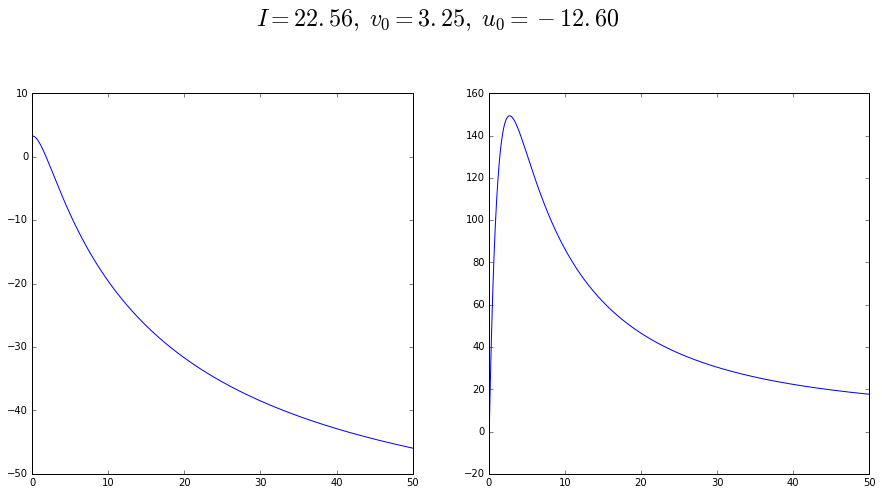

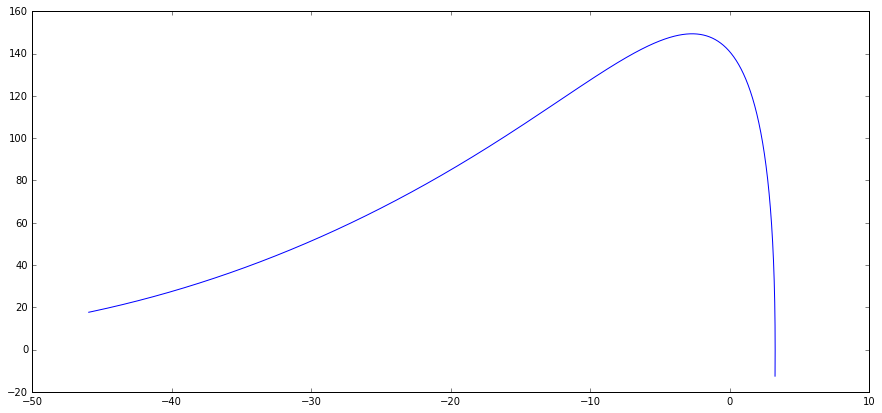

In [14]:
get_plot(I_critical, (v_critical + 2, u_critical + e_y[0]))

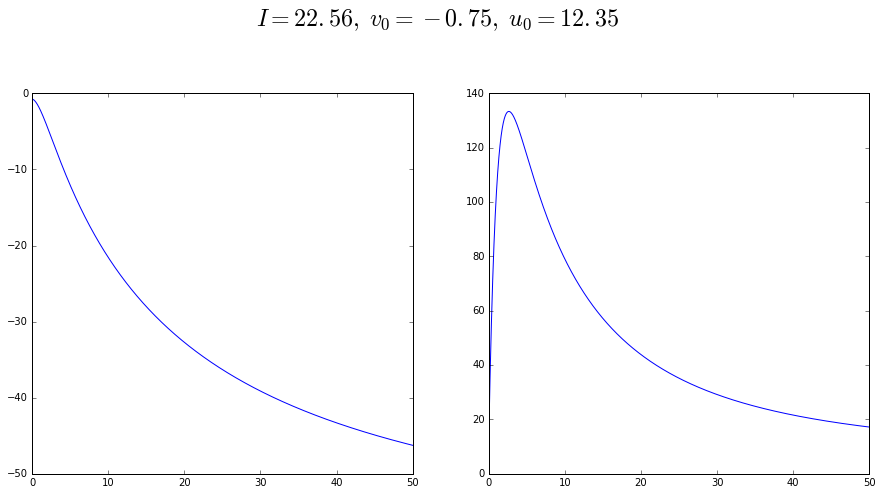

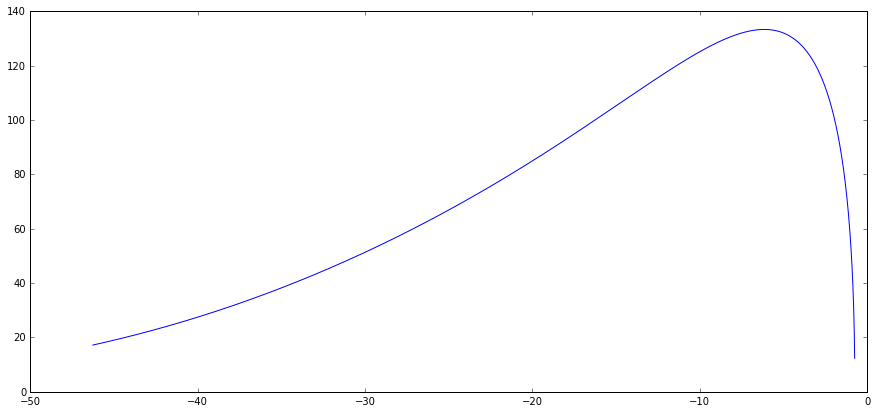

In [15]:
get_plot(I_critical, (v_critical - 2, u_critical - e_y[0]))

# Phase portrait

Now we can use
$$\left( v_0, u_0 \right) = \left( -70, -20 \right)$$

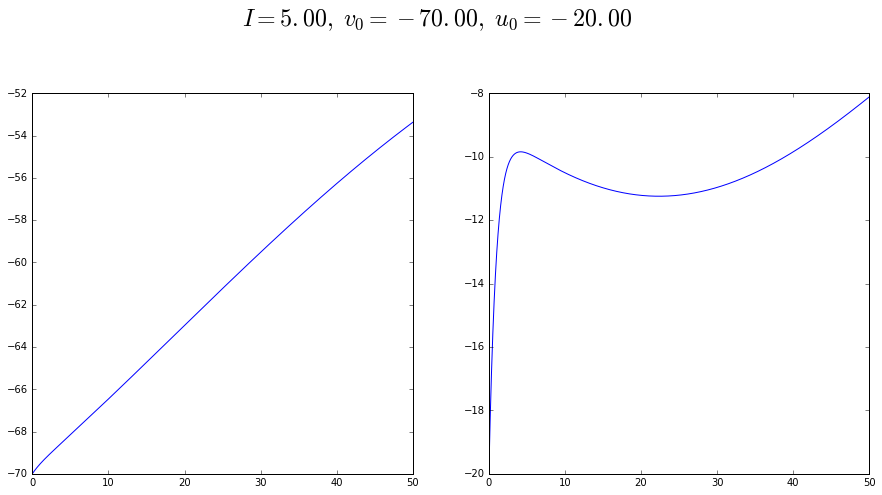

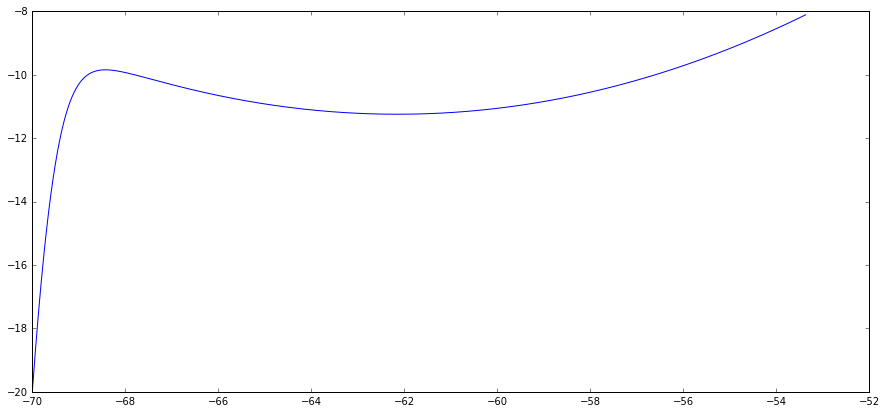

In [16]:
get_plot(5)

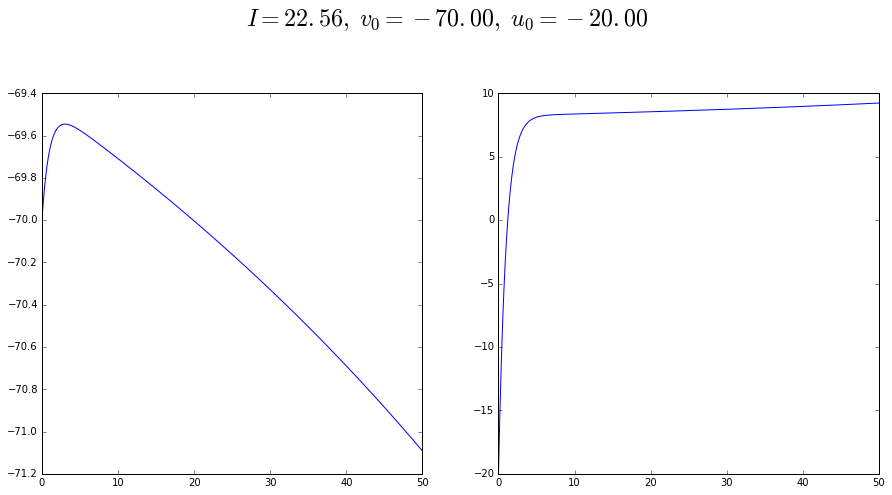

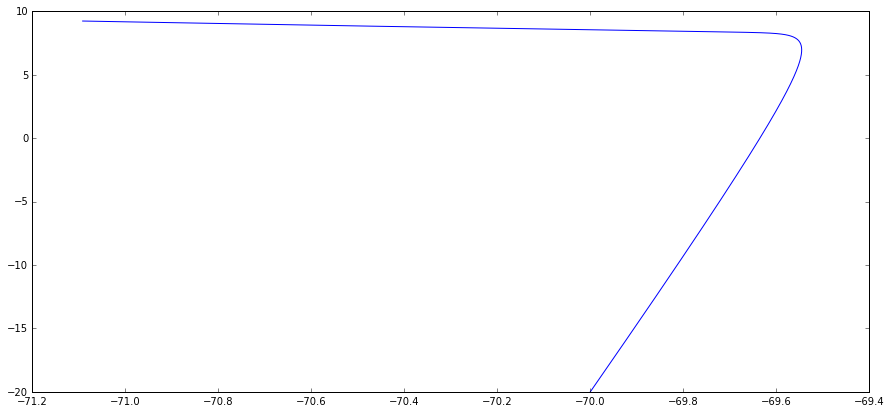

In [17]:
get_plot(I_critical)

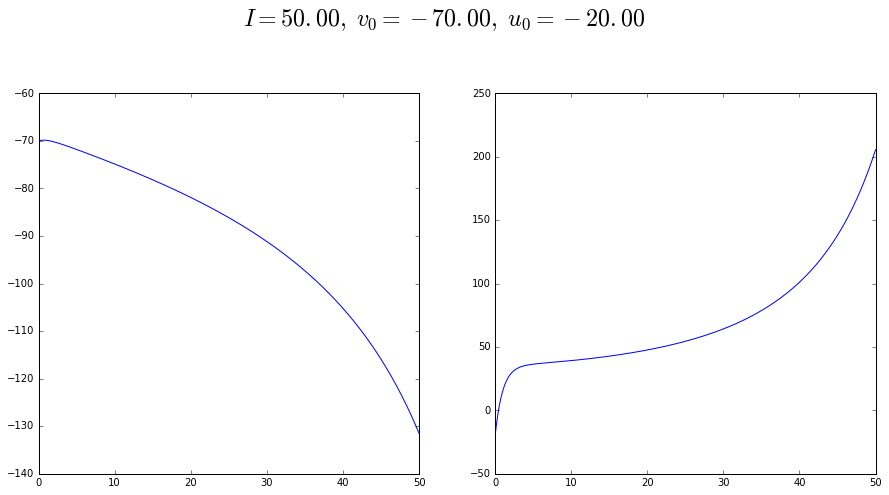

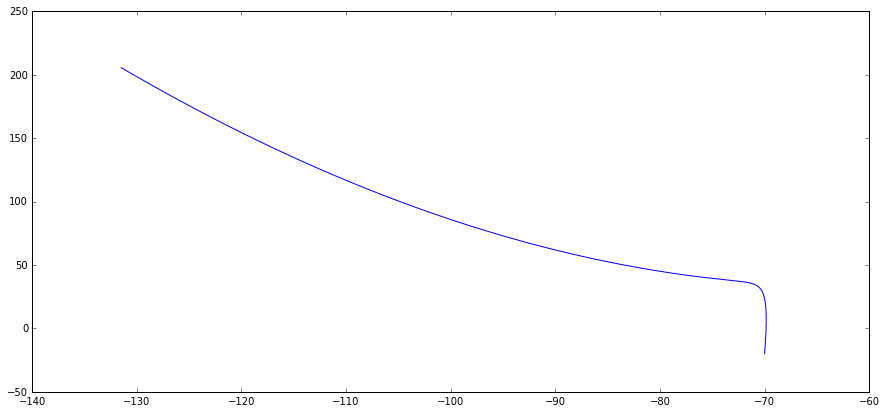

In [18]:
get_plot(50)